In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.utils.np_utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train:', x_train.shape)
print('Y_train:', y_train.shape)
print('X_test :', x_test.shape)
print('Y_test :', y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test : (10000, 28, 28)
Y_test : (10000,)


In [3]:
x_train = np.reshape(x_train, newshape=(60000, 784)).astype('float64')
x_test = np.reshape(x_test, newshape=(10000, 784)).astype('float64')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
x_train = x_train/255
x_test = x_test/255

print('X_train:', x_train.shape)
print('Y_train:', y_train.shape)
print('X_test :', x_test.shape)
print('Y_test :', y_test.shape)

X_train: (60000, 784)
Y_train: (60000, 10)
X_test : (10000, 784)
Y_test : (10000, 10)


# Autoencoder-1

In [4]:
i1 = Input(shape=(784,))
h1 = Dense(100, activation='sigmoid')(i1)
o1 = Dense(784, activation='sigmoid')(h1)

autoencoder_1 = Model(inputs = i1, outputs = o1)
autoencoder_1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               79184     
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


2022-04-19 18:45:12.056401: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
history1 = autoencoder_1.fit(x_train, x_train, epochs=10)

2022-04-19 18:45:13.174751: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0426 - accuracy: 0.0115
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0184 - accuracy: 0.0120
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.0115
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.0127
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0075 - accuracy: 0.0127
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0062 - accuracy: 0.0133
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0051 - accuracy: 0.0142
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0043 - accuracy: 0.0137
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0038 - accuracy: 0.0147
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.003

Text(0.5, 1.0, 'Predicted')

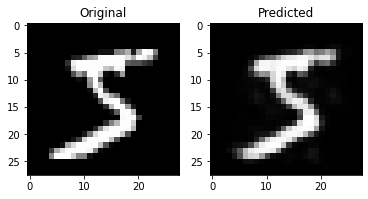

In [6]:
original_img = x_train[0].reshape(28,28)
predicted_img = autoencoder_1.predict(x_train[0].reshape(1,784))[0].reshape(28,28)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(original_img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(predicted_img, cmap='gray')
ax2.set_title('Predicted')

In [7]:
ae1_hidden_output = autoencoder_1.layers[1].output
trimmed_ae1 = Model(inputs=i1, outputs=ae1_hidden_output)
x_train_ae1 = trimmed_ae1.predict(x_train)
x_test_ae1 = trimmed_ae1.predict(x_test)

# Autoencoder 2

In [8]:
i2 = Input(shape=(100,))
h2 = Dense(50, activation='sigmoid')(i2)
o2 = Dense(100, activation='sigmoid')(h2)
autoencoder_2 = Model(inputs=i2, outputs=o2)
autoencoder_2.summary()

autoencoder_2.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
Total params: 10,150
Trainable params: 10,150
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder_2.fit(x_train_ae1, x_train_ae1, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.0441
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0289 - accuracy: 0.0926
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.1206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.1351
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.1408


In [10]:
ae2_hidden_output = autoencoder_2.layers[1].output
trimmed_ae2 = Model(inputs=i2, outputs=ae2_hidden_output)
x_train_ae2 = trimmed_ae2.predict(x_train_ae1)
x_test_ae2 = trimmed_ae2.predict(x_test_ae1)

In [11]:
i3 = Input(shape=(50,))
o3 = Dense(10, activation='softmax')(i3)
snn = Model(inputs=i3, outputs=o3)
snn.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
snn.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 510
Trainable params: 510
Non-trainable params: 0
_________________________________________________________________


In [12]:
snn.fit(x_train_ae2, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5614 - accuracy: 0.6274
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8555 - accuracy: 0.8195
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6575 - accuracy: 0.8387
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5734 - accuracy: 0.8481
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5282 - accuracy: 0.8543
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5003 - accuracy: 0.8578
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4816 - accuracy: 0.8606
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4680 - accuracy: 0.8633
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4577 - accuracy: 0.8645
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.449

In [13]:
model = Sequential()
model.add(autoencoder_1.layers[0])
model.add(autoencoder_1.layers[1])
model.add(autoencoder_2.layers[1])
model.add(snn.layers[-1])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2737 - accuracy: 0.9185
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1678 - accuracy: 0.9513
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1228 - accuracy: 0.9649
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0953 - accuracy: 0.9719
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0766 - accuracy: 0.9774
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0625 - accuracy: 0.9822
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9849
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9878
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0353 - accuracy: 0.9898
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.027

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9749


[0.10676345229148865, 0.9749000072479248]